In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from PIL import Image
# import pillow_heif  # Library for HEIC to PNG conversion

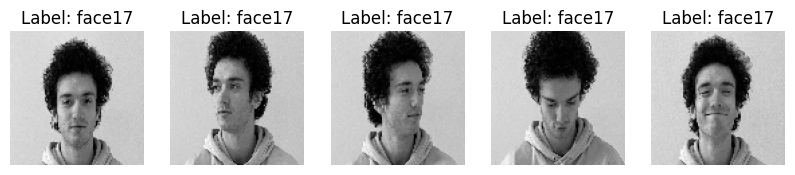

(array([[195., 193., 194., ..., 182., 175., 173.],
        [194., 195., 192., ..., 175., 172., 175.],
        [194., 195., 194., ..., 175., 174., 177.],
        [195., 198., 196., ..., 130., 131., 136.],
        [193., 187., 197., ..., 173., 173., 170.]], dtype=float32),
 array(['face17', 'face17', 'face17', 'face17', 'face17'], dtype='<U6'),
 ['IMG_2404.png',
  'IMG_2405.png',
  'IMG_2406.png',
  'IMG_2407.png',
  'IMG_2408.png'])

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

# Function to load and show images
def load_and_show_data(folder, num_images=5):
    images = []
    labels = []
    filenames = []
    
    # Load images from subdirectories in the main folder
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)  # Path to the subdirectory
        if os.path.isdir(subfolder_path):  # Check if it's a directory
            for filename in os.listdir(subfolder_path):
                if filename.lower().endswith('.png'):
                    img = load_img(os.path.join(subfolder_path, filename), color_mode='grayscale', target_size=(100, 100))
                    images.append(img_to_array(img).flatten())
                    labels.append(subfolder)  # Use subfolder name as the label
                    filenames.append(filename)
                    if len(images) >= num_images:  # Limit number of images loaded for display
                        break
        if len(images) >= num_images:  # Break outer loop if we have enough images
            break
    
    # Convert to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    # Show the images with their labels
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i].reshape(100, 100), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    
    plt.show()

    return np.array(images), np.array(labels), filenames

# Usage example
folder_path = os.getcwd() + "\\Face Images\\Final Training Images"
load_and_show_data(folder_path, num_images=5)


Training Data:


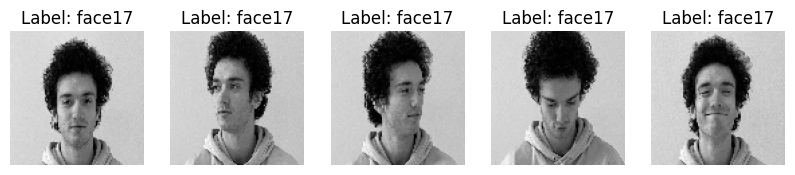

Testing Data:


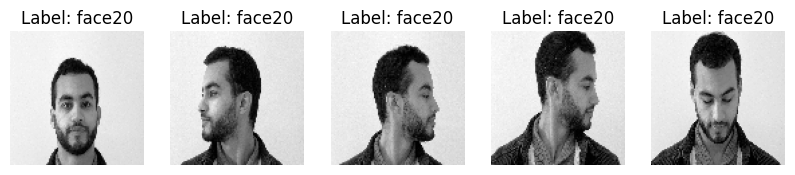

In [6]:
# Define the main folder containing the training and testing images
main_folder = os.getcwd() + "\\Face Images\\Final Training Images"
test_folder = os.getcwd() + "\\Face Images\\Test Images"  # Adjust this path for test images if necessary

# Load and show data from the train folder
print("Training Data:")
train_images, train_labels, train_filenames = load_and_show_data(main_folder, num_images=5)

# Load and show data from the test folder, if it exists
if os.path.exists(test_folder):
    print("Testing Data:")
    test_images, test_labels, test_filenames = load_and_show_data(test_folder, num_images=5)
else:
    print("Test folder does not exist.")

# At this point, `train_images` and `test_images` are ready for further processing,
# such as applying PCA, training a model, etc.

In [11]:

# Function to load images and labels from a folder and its subfolders
def load_data(folder_path):
    images = []
    labels = []
    
    # Loop through each subfolder in the main folder
    for label in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, label)
        
        if os.path.isdir(subfolder_path):  # Check if it's a directory
            for filename in os.listdir(subfolder_path):
                if filename.lower().endswith('.png'):  # Ensure only PNG files are processed
                    img = load_img(os.path.join(subfolder_path, filename), color_mode='grayscale', target_size=(100, 100))
                    images.append(img_to_array(img).flatten())  # Flatten the image
                    labels.append(label)  # Use the folder name as the label
    
    return np.array(images), np.array(labels)


In [12]:
# Path to your images folder
folder_path = os.getcwd() + "\\Face Images\\Final Training Images"

# Load training data
train_images, train_labels = load_data(folder_path)

# Display the loaded data
print("Training Data Loaded:")
print(f"Number of images: {train_images.shape[0]}")
print(f"Number of labels: {train_labels.shape[0]}")


Training Data Loaded:
Number of images: 150
Number of labels: 150


In [13]:
# Function to normalize the data
def normalize_data(X_train, X_test):
    scaler = StandardScaler()  # Create a StandardScaler instance
    X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform it
    X_test_scaled = scaler.transform(X_test)  # Only transform the test data
    
    return X_train_scaled, X_test_scaled

In [14]:
# Load the data from the specified train and test folders
train_path = os.getcwd() + "\\Face Images\\Final Training Images"  # Update the path for training data
test_path = os.getcwd() + "\\Face Images\\Final Testing Images"    # Update the path for testing data

# Load training and testing data using the updated function
X_train, y_train = load_data(train_path)  # Load data from the training subfolders
X_test, y_test = load_data(test_path)      # Load data from the testing subfolders

# Normalize the train and test data
X_train_normalized, X_test_normalized = normalize_data(X_train, X_test)

# Now `X_train_normalized` and `X_test_normalized` are normalized and ready for further processing
print("Training data shape:", X_train_normalized.shape)
print("Testing data shape:", X_test_normalized.shape)


Training data shape: (150, 10000)
Testing data shape: (150, 10000)


In [15]:
# Step 1: Define a function to compute the mean face
def compute_mean_face(images):
    # Convert images list into a numpy array if it's not already
    images_array = np.array(images)
    
    # Compute the mean of the images along the first axis (average pixel-wise)
    mean_face = np.mean(images_array, axis=0)
    
    return mean_face


In [16]:
# Assuming X_train contains the flattened images
mean_face = compute_mean_face(X_train_normalized)  # Use normalized images for better visualization


In [17]:
# Load and preprocess the images
def load_and_preprocess_data(folder_path):
    # Load the images and labels
    images, labels = load_data(folder_path)
    
    # Normalize the images using StandardScaler
    scaler = StandardScaler()
    images_normalized = scaler.fit_transform(images)  # Fit and transform
    
    return images_normalized, labels


In [18]:
# Subtract the mean face from each image
def subtract_mean_face(images, mean_face):
    images_centered = images - mean_face  # Subtract mean face from each image
    return images_centered


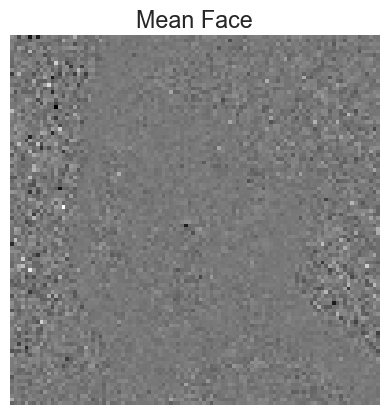

In [137]:
# Step 4: Putting everything together
# Load, preprocess data, and compute the mean face
train_path = os.getcwd() + "\\Face Images\\Final Training Images"
test_path = os.getcwd() + "\\Face Images\\Test Images"

# Load and preprocess training data
X_train_normalized, y_train = load_and_preprocess_data(train_path)

# Compute the mean face from the training data
mean_face = compute_mean_face(X_train_normalized)

# Subtract the mean face from each image
X_train_centered = subtract_mean_face(X_train_normalized, mean_face)

# Visualize the mean face
show_mean_face(mean_face)

# Load and preprocess test data
X_test_normalized, y_test = load_and_preprocess_data(test_path)

# Subtract the mean face from the test images
X_test_centered = subtract_mean_face(X_test_normalized, mean_face)


In [19]:
centered_and_normalized_faces = np.random.rand(100, 64, 64)  # par exemple, 100 images de 64x64

# Maintenant, vous pouvez accéder à sa forme
print(centered_and_normalized_faces.shape)

(100, 64, 64)


In [20]:
# Apply PCA to the training data (centered data)
def apply_pca(X_train_centered, n_components=42):
    pca = PCA(n_components=n_components)  # You can adjust the number of components
    X_train_pca = pca.fit_transform(X_train_centered)  # Fit PCA on the centered training data
    return pca, X_train_pca


In [21]:
# Visualize the Eigenfaces (principal components)
def plot_eigenfaces(pca, image_shape=(100, 100), num_eigenfaces=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_eigenfaces):
        plt.subplot(2, 5, i + 1)
        eigenface = pca.components_[i].reshape(image_shape)  # Reshape each principal component to image dimensions
        plt.imshow(eigenface, cmap='gray')
        plt.title(f"Eigenface {i + 1}")
        plt.axis('off')
    plt.show()


In [22]:
# Project images onto the PCA space (for both train and test sets)
def project_onto_pca(pca, X_centered):
    return pca.transform(X_centered)  # Transform centered data into PCA space


In [23]:
# Display the first 20 Eigenfaces in a 4x5 grid
def plot_first_20_eigenfaces(pca, image_shape=(100, 100)):
    plt.figure(figsize=(15, 10))  # Create a large figure to display 20 images
    for i in range(20):
        plt.subplot(4, 5, i + 1)  # Create a 4x5 grid of subplots
        eigenface = pca.components_[i].reshape(image_shape)  # Reshape each eigenface
        plt.imshow(eigenface, cmap='gray')
        plt.title(f"Eigenface {i + 1}")
        plt.axis('off')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

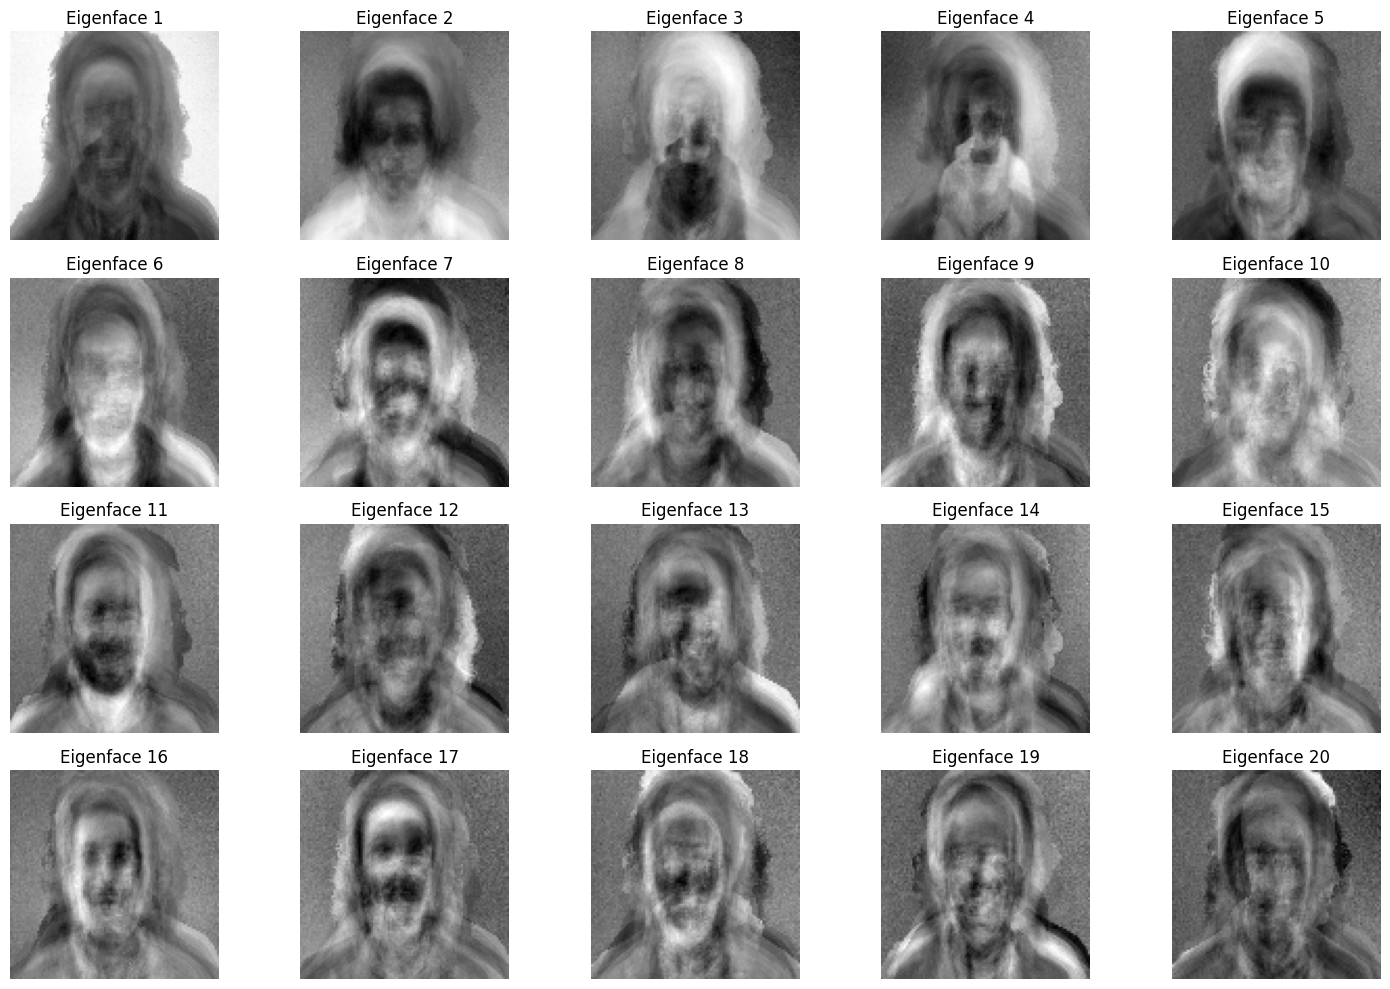

In [24]:
# Paths to your train folder
train_path = os.getcwd() + "\\Face Images\\Final Training Images"

# Load and preprocess training data
X_train_normalized, y_train = load_and_preprocess_data(train_path)

# Compute the mean face from the training data
mean_face = np.mean(X_train_normalized, axis=0)

# Subtract the mean face from the training data
X_train_centered = X_train_normalized - mean_face

# Apply PCA on the centered training data
pca, X_train_pca = apply_pca(X_train_centered, n_components=42)

# Visualize the first 20 Eigenfaces
plot_first_20_eigenfaces(pca, image_shape=(100, 100))

In [25]:
# Function to extract class labels from filenames (if filenames encode class info)
def extract_label_from_filename(filename):
    # Extract label from filename, assuming it's the first part of the filename, like 'personID_imgX.png'
    try:
        # For filenames like 'person1_image1.png', the label could be 'person1'
        return filename.split('_')[0]  # Modify this if your filenames follow a different pattern
    except IndexError:
        return None

In [26]:
# Function to extract class labels from filenames
def extract_label_from_filename(filename):
    # Extract the numeric part after 'IMG_' in the filename, e.g., 'IMG_2404.png' -> '2404'
    try:
        # Split the filename by '_' and take the second part (numeric part)
        return filename.split('_')[1].split('.')[0]  # This will return the numeric part as a string
    except IndexError:
        return None

In [29]:
def load_filenames_and_labels(folder_path):
    filenames = []
    labels = []
    
    for person_folder in os.listdir(folder_path):
        person_path = os.path.join(folder_path, person_folder)
        
        if os.path.isdir(person_path):  # Check if it's a directory
            for filename in os.listdir(person_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Ensure only image files are processed
                    filenames.append(os.path.join(person_folder, filename))  # Store full path or just filename
                    labels.append(person_folder)  # Use folder name as label

    return filenames, labels

In [30]:
# Paths to the train and test directories
train_dir = os.getcwd() + "\\Face Images\\Final Training Images"
test_dir = os.getcwd() + "\\Face Images\\Test Images"

# Load image filenames and labels for train and test directories
train_filenames, train_labels = load_filenames_and_labels(train_dir)
test_filenames, test_labels = load_filenames_and_labels(test_dir)

# Output the results
print("Train Filenames:", train_filenames)
print("Train Labels:", train_labels)
print("Test Filenames:", test_filenames)
print("Test Labels:", test_labels)

Train Filenames: ['face1\\image_0001_Face_1.jpg', 'face1\\image_0002_Face_2.jpg', 'face1\\image_0003_Face_1.jpg', 'face1\\image_0004_Face_1.jpg', 'face1\\image_0005_Face_1.jpg', 'face1\\image_0006_Face_1.jpg', 'face1\\image_0007_Face_1.jpg', 'face1\\image_0008_Face_1.jpg', 'face1\\image_0009_Face_1.jpg', 'face1\\image_0010_Face_1.jpg', 'face1\\image_0011_Face_1.jpg', 'face1\\image_0017_Face_1.jpg', 'face1\\image_0018_Face_1.jpg', 'face1\\image_0019_Face_1.jpg', 'face1\\image_0020_Face_1.jpg', 'face10\\image_0221_Face_1.jpg', 'face10\\image_0222_Face_2.jpg', 'face10\\image_0223_Face_1.jpg', 'face10\\image_0224_Face_1.jpg', 'face10\\image_0225_Face_1.jpg', 'face10\\image_0226_Face_1.jpg', 'face10\\image_0227_Face_1.jpg', 'face10\\image_0228_Face_1.jpg', 'face10\\image_0229_Face_1.jpg', 'face10\\image_0230_Face_1.jpg', 'face10\\image_0232_Face_1.jpg', 'face10\\image_0233_Face_1.jpg', 'face10\\image_0234_Face_1.jpg', 'face10\\image_0235_Face_1.jpg', 'face10\\image_0236_Face_1.jpg', 'face10

In [33]:
# Function to process images
def process_image(image_path, target_size=(100, 100)):
    img = load_img(image_path, target_size=target_size, color_mode='grayscale')
    return img_to_array(img).flatten()

In [34]:
def load_and_preprocess_images(image_folder):
    image_filenames = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    X_images = np.array([process_image(os.path.join(image_folder, f)) for f in image_filenames])
    return X_images, image_filenames


def load_and_preprocess_images(folder_path):
    images = []
    labels = []
    
    for person_folder in os.listdir(folder_path):
        person_path = os.path.join(folder_path, person_folder)
        
        if os.path.isdir(person_path):  # Check if it's a directory
            for filename in os.listdir(person_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Ensure only image files are processed
                    img = load_img(os.path.join(person_path, filename), color_mode='grayscale', target_size=(100, 100))
                    images.append(img_to_array(img).flatten())  # Flatten the image
                    labels.append(person_folder)  # Use folder name as label

    return np.array(images), np.array(labels)

In [35]:
train_dir = os.getcwd() + "\\Face Images\\Final Training Images"
test_dir = os.getcwd() + "\\Face Images\\Test Images"

# Load and preprocess your training data
X_train, train_labels = load_and_preprocess_images(train_dir)

# Normalize and apply PCA to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data

# Calculate the mean face and center the training data
mean_face = np.mean(X_train_scaled, axis=0)
X_train_centered = X_train_scaled - mean_face
pca = PCA(n_components=42)  # Choose the number of components based on your requirement
X_train_pca = pca.fit_transform(X_train_centered)

# Load and preprocess your test data
X_test, y_test = load_and_preprocess_images(test_dir)

# Normalize the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Center the test data by subtracting the mean face
X_test_centered = X_test_scaled - mean_face

# Apply PCA on the test data
X_test_pca = pca.transform(X_test_centered)  # Use the PCA model fitted on the training data

# Now, calculate predicted labels for the test data
y_pred_pca = []

for i in range(X_test_pca.shape[0]):
    # Calculate distances between the test image and all training images
    distances = np.linalg.norm(X_train_pca - X_test_pca[i], axis=1)
    # Find the index of the closest training image
    recognized_face_index = np.argmin(distances)
    # Get the corresponding label of the closest training image
    recognized_face_label = train_labels[recognized_face_index]
    y_pred_pca.append(recognized_face_label)

print("Predicted Labels for Test Data:\n", y_pred_pca)

Predicted Labels for Test Data: ['face20', 'face20', 'face20', 'face20', 'face20', 'face20', 'face20', 'face20', 'face20', 'face21', 'face21', 'face21', 'face21', 'face21', 'face21', 'face21', 'face21', 'face21', 'face21', 'face22', 'face22', 'face22', 'face22', 'face22', 'face22', 'face22', 'face22', 'face23', 'face23', 'face23', 'face23', 'face23', 'face23', 'face23', 'face23', 'face23', 'face23', 'face24', 'face24', 'face24', 'face24', 'face24', 'face24', 'face24', 'face24', 'face24', 'face24', 'face24', 'face24', 'face24', 'face25', 'face25', 'face25', 'face25', 'face25', 'face25', 'face25', 'face25', 'face25', 'face25', 'face25', 'face3', 'face3', 'face3', 'face3', 'face3', 'face3', 'face3', 'face3', 'face3', 'face3', 'face3', 'face3', 'face3', 'face3', 'face4', 'face4', 'face4', 'face4', 'face4', 'face4', 'face4', 'face4', 'face4', 'face4', 'face4', 'face4', 'face4', 'face4', 'face4', 'face4', 'face4', 'face5', 'face5', 'face5', 'face5', 'face5', 'face5', 'face5', 'face5', 'face5

In [36]:
train_dir = os.getcwd() + "\\Face Images\\Final Training Images"
if os.path.exists(train_dir):
    files_in_directory = os.listdir(train_dir)
    print(f"Fichiers dans le répertoire {train_dir}:")
    print(files_in_directory)
else:
    print(f"Le répertoire {train_dir} n'existe pas.")


Fichiers dans le répertoire c:\Users\yassi\OneDrive\Documents\01_CURRENT_PROJECTS\Face-Recognition-Performance-and-Efficiency-A-Comparative-Study-of-PCA-and-a-Machine-Learning-Model\Face Images\Final Training Images:
['.DS_Store', 'face1', 'face10', 'face11', 'face12', 'face13', 'face14', 'face15', 'face16', 'face17', 'face18', 'face19', 'face2', 'face20', 'face21', 'face22', 'face23', 'face24', 'face25', 'face26', 'face27', 'face28', 'face29', 'face3', 'face30', 'face31', 'face4', 'face5', 'face6', 'face7', 'face8', 'face9']


In [37]:
def calculate_accuracy(y_true, y_pred):
    # Calcul de l'accuracy
    accuracy = accuracy_score(y_true, y_pred) * 100  # Convertir en pourcentage

    # Affichage des résultats
    print(f"Accuracy: {accuracy:.2f}%")
   
    
    return accuracy


In [38]:
# Appel de la fonction
accuracy = calculate_accuracy(y_test, y_pred_pca)

Accuracy: 100.00%


In [39]:
# Function to calculate recognition score
def calculate_recognition_score(true_labels, predicted_labels):
    correct_predictions = sum(np.array(true_labels) == np.array(predicted_labels))
    total_predictions = len(true_labels)
    recognition_score = (correct_predictions / total_predictions) * 100
    return recognition_score

# Calculate and print the recognition score
recognition_score = calculate_recognition_score(y_test, y_pred_pca)
print(f"Recognition Score: {recognition_score:.2f}%")


Recognition Score: 100.00%


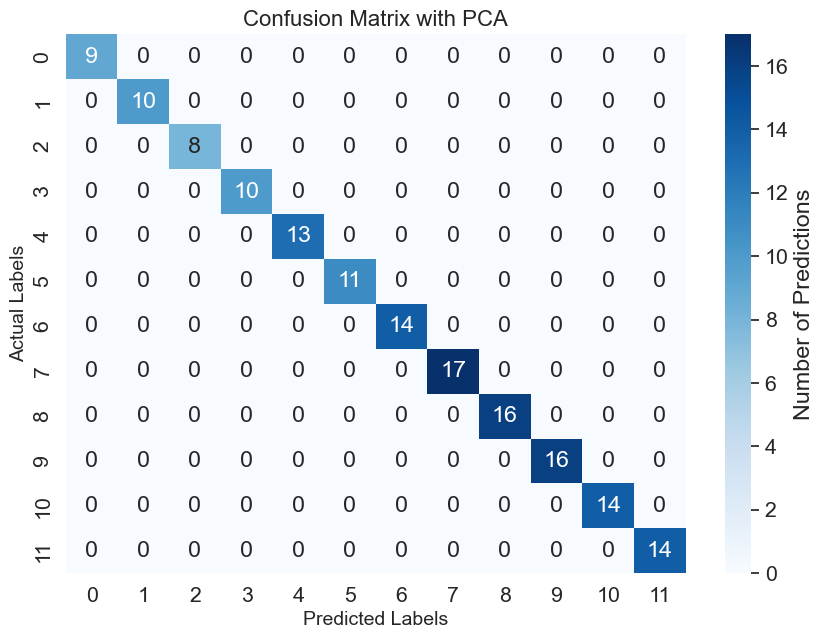

In [40]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_pca)

# Set up the matplotlib figure
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # Increase font size for readability

# Create the heatmap with integer labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.arange(cm.shape[1]),  # Use integers for the x-axis labels
            yticklabels=np.arange(cm.shape[0]),  # Use integers for the y-axis labels
            cbar_kws={'label': 'Number of Predictions'})

# Customize labels and title
plt.title('Confusion Matrix with PCA', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)

# Show the plot
plt.show()